# COUNTRIES OF THE WORLD DATA SET

The data set chosen is on the countries of the world which has been taken from Kaggle: https://www.kaggle.com/fernandol/countries-of-the-world/data. The data was originally compiled by the US Government and contains data from 1970 – 2017. The data contains information about 227 countries including population, net migration, mortality rates, GDP etc. There are 20 columns in the data set.

In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import geoplotlib
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer
from bubbly.bubbly import bubbleplot

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column

In [3]:
#import the data
df = pd.read_csv('countries of the world.csv')
df.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
20,Belize,LATIN AMER. & CARIB,287730,22966,12.5,1.68,0.00,25.69,4900.0,94.1,115.7,2.85,1.71,95.44,2.0,28.84,5.72,0.142,0.152,0.612
157,Palau,OCEANIA,20579,458,44.9,331.66,2.85,14.84,9000.0,92.0,325.6,8.70,4.35,86.95,2.0,18.03,6.80,0.062,0.120,0.818
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.7,0.15,-0.84,41.58,7000.0,79.4,276.4,8.72,1.39,89.89,1.0,17.00,5.55,0.116,0.424,0.460
175,Saint Vincent and the Grenadines,LATIN AMER. & CARIB,117848,389,303.0,21.59,-7.64,14.78,2900.0,96.0,190.9,17.95,17.95,64.10,2.0,16.18,5.98,0.100,0.260,0.640
166,Qatar,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197
137,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,NaN,15.70,12.64,0.213,0.233,0.555
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,1.0,45.13,16.63,0.650,0.100,0.250
111,Kuwait,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,211.0,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516


## DATA CLEANING

The first thing we must do is check the data types of each column to ensure that the data is in the correct type.

We will first look at the missing data and how many values are missing per column. The data in this file cannot be deleted as we will be deleting important data from the country and region column. We will need none conventional ways to either fill the data or represent it in a correct way.

In [30]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

e can immediately see that most of the data has been defaulted to object value even though it is either a float or integer. We need to change this so that we do not get any errors when trying to clean our data.

We have seen in the introduction of this document that the only strings in this data frame is ‘Country’ and ‘Region’ column.

We need to ensure that the other columns are converted to the correct data types.


In [35]:
df[['Population','Area (sq. mi.)',
    'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)',
    'Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)',
    'Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)',
    'Climate','Birthrate','Deathrate','Agriculture','Industry','Service']] = df[['Population','Area (sq. mi.)',
    'Pop. Density (per sq. mi.)','Coastline (coast/area ratio)',
    'Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)',
    'Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)',
    'Climate','Birthrate','Deathrate','Agriculture','Industry','Service']].astype(float)
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

<br>


### MISSING DATA

We will also look at the missing data and how many values are missing per column. The data in this file cannot be deleted as we will be deleting important data from the country and region column. We will need none conventional ways to either fill the data or represent it in a correct way.

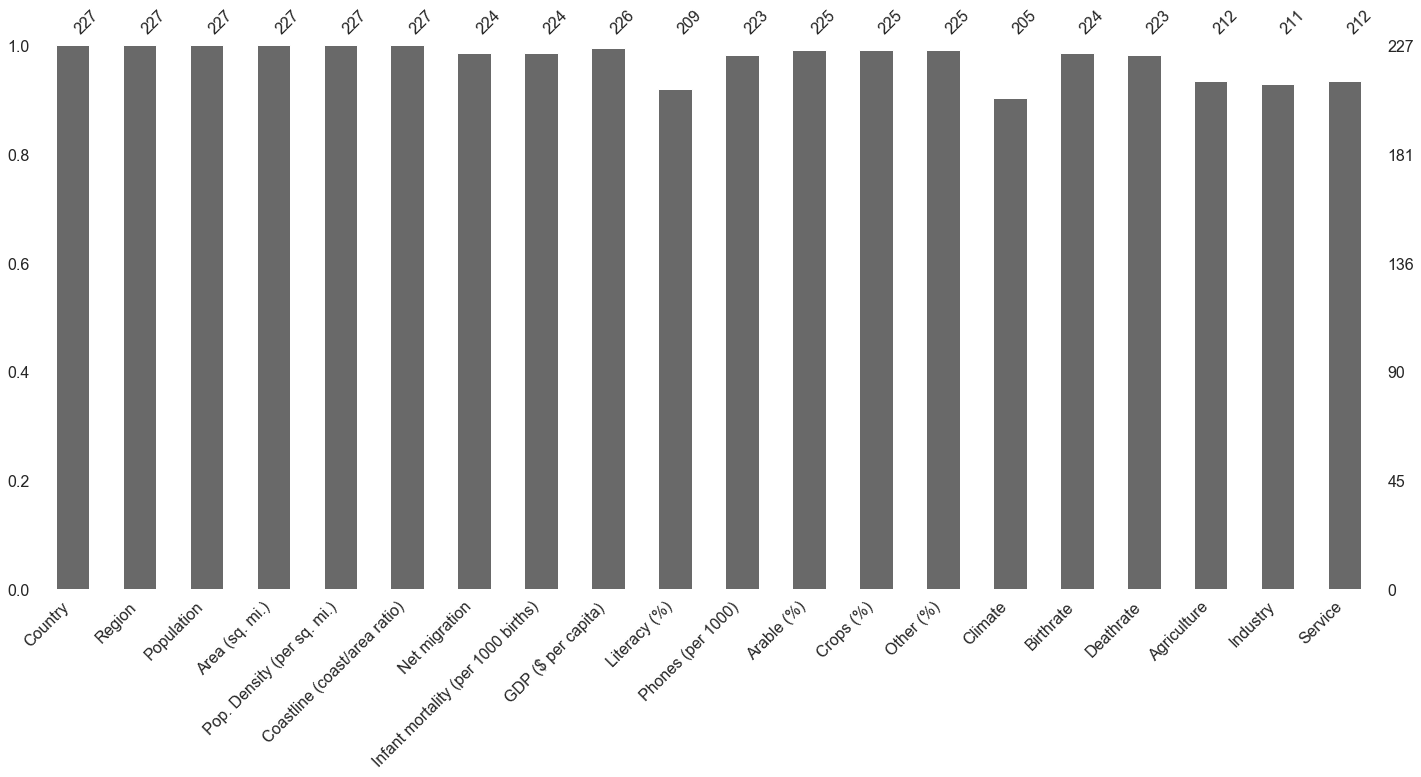

In [167]:
msn.bar(df)

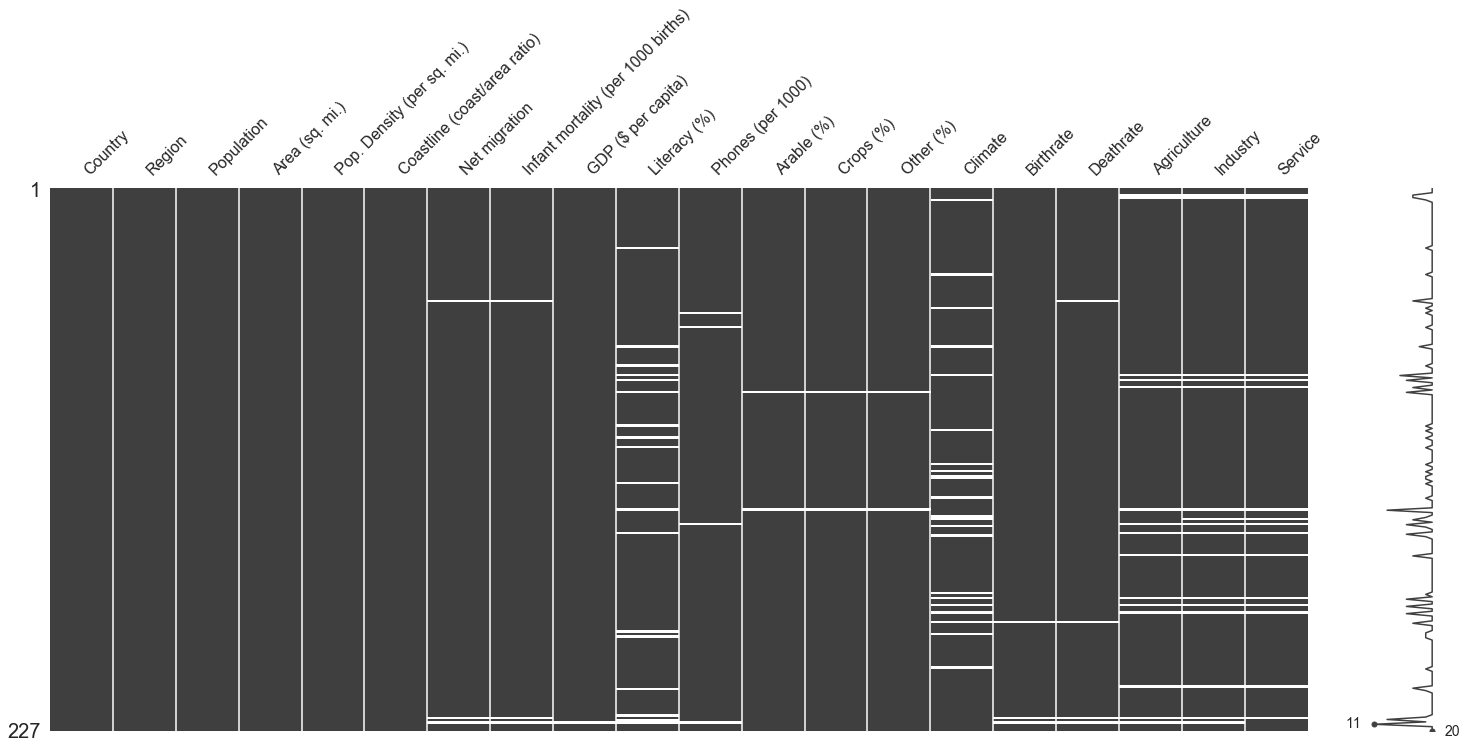

In [168]:
msn.matrix(df)

In [188]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

There are several columns with missing data but this quite minimal per column. The column with the most data missing is ‘Climate’ with 22 values. Let’s look at these columns individually and how we may find a solution.

We will group by the region and take the mean of the grouped values to fill the missing information. Looking at the columns with missing values, it highly likely that the countries will have the similar data in the same region.

In [192]:
#Filling missing data with the mean of the columns grouped by Region

df["Net migration"].fillna(df.groupby("Region")["Net migration"].transform("mean"), inplace=True)
df["Infant mortality (per 1000 births)"].fillna(df.groupby("Region")["Infant mortality (per 1000 births)"].transform("mean"), inplace=True)
df["Agriculture"].fillna(df.groupby("Region")["Agriculture"].transform("mean"), inplace=True)
df["GDP ($ per capita)"].fillna(df.groupby("Region")["GDP ($ per capita)"].transform("mean"), inplace=True)
df["Literacy (%)"].fillna(df.groupby("Region")["Literacy (%)"].transform("mean"), inplace=True)
df["Phones (per 1000)"].fillna(df.groupby("Region")["Phones (per 1000)"].transform("mean"), inplace=True)
df["Arable (%)"].fillna(df.groupby("Region")["Arable (%)"].transform("mean"), inplace=True)
df["Crops (%)"].fillna(df.groupby("Region")["Crops (%)"].transform("mean"), inplace=True)
df["Other (%)"].fillna(df.groupby("Region")["Other (%)"].transform("mean"), inplace=True)
df["Climate"].fillna(df.groupby("Region")["Climate"].transform("mean"), inplace=True)
df["Birthrate"].fillna(df.groupby("Region")["Birthrate"].transform("mean"), inplace=True)
df["Deathrate"].fillna(df.groupby("Region")["Deathrate"].transform("mean"), inplace=True)
df["Industry"].fillna(df.groupby("Region")["Industry"].transform("mean"), inplace=True)
df["Service"].fillna(df.groupby("Region")["Service"].transform("mean"), inplace=True)


In [193]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

<br>

## DATA STORIES AND VISUALIZATIONS

<br>

Now that we have cleaned the data, we can start analyzing the data and bring out some insights. We first look at the data and make a few hypotheses regarding the data and use visualization to prove and disprove the hypothesis.

### Hypotheses

1.	Western countries have the highest GDP per capita than any other region.,<br>
2.	African countries hae the lowest literacy rate in the whole world.<br>
3.	Asia has the highest literacy rate.<br>
4.	Asia has the largest population rate.<br>
5.	The middle eastern regions have the lowest arable lands.<br>
6.	The higher the literacy rate, the higher the GDP per capita.<br>
7.	The higher the literacy rate, the higher the service component as distribution to the economy of the country.<br>
8.	Countries in the far east will have a high industry rate.<br>
9.	The climate will have a high relationship with how arable the land is.<br>
10.	The more arable the land is, the more agriculture contributes to the economy.<br>                           


<br>

In [195]:
df.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
90,Honduras,LATIN AMER. & CARIB,7326496,112090,65.4,0.73,-1.99,29.32,2600.0,76.200000,67.5,9.55,3.22,87.23,2.000000,28.24,5.28,0.139000,0.31200,0.549000
145,Nepal,ASIA (EX. NEAR EAST),28287147,147181,192.2,0.00,0.00,66.98,1400.0,45.200000,15.9,21.68,0.64,77.68,1.962963,30.98,9.31,0.380000,0.21000,0.410000
84,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.600000,92.1,12.54,5.03,82.43,2.000000,29.88,5.20,0.227000,0.18800,0.585000
147,Netherlands Antilles,LATIN AMER. & CARIB,221736,960,231.0,37.92,-0.41,10.03,11400.0,96.700000,365.3,10.00,0.00,90.00,2.000000,14.78,6.45,0.010000,0.15000,0.840000
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,97.088889,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142000,0.30800,0.550000
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.000000,7.8,2.41,0.24,97.35,1.885417,45.11,24.20,0.096000,0.65800,0.246000
81,Grenada,LATIN AMER. & CARIB,89703,344,260.8,35.17,-13.92,14.62,5000.0,98.000000,364.5,5.88,29.41,64.71,2.000000,22.08,6.88,0.054000,0.18000,0.766000
137,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.100000,208.1,55.30,10.79,33.91,2.550000,15.70,12.64,0.213000,0.23300,0.555000
164,Portugal,WESTERN EUROPE,10605870,92391,114.8,1.94,3.57,5.05,18000.0,93.300000,399.2,21.75,7.81,70.44,3.000000,10.72,10.50,0.053000,0.27400,0.673000
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.000000,492.0,9.09,16.36,74.55,2.000000,18.79,4.48,0.175125,0.21525,0.608937


<br>

### RELATIONSHIPS BETWEEN DATA

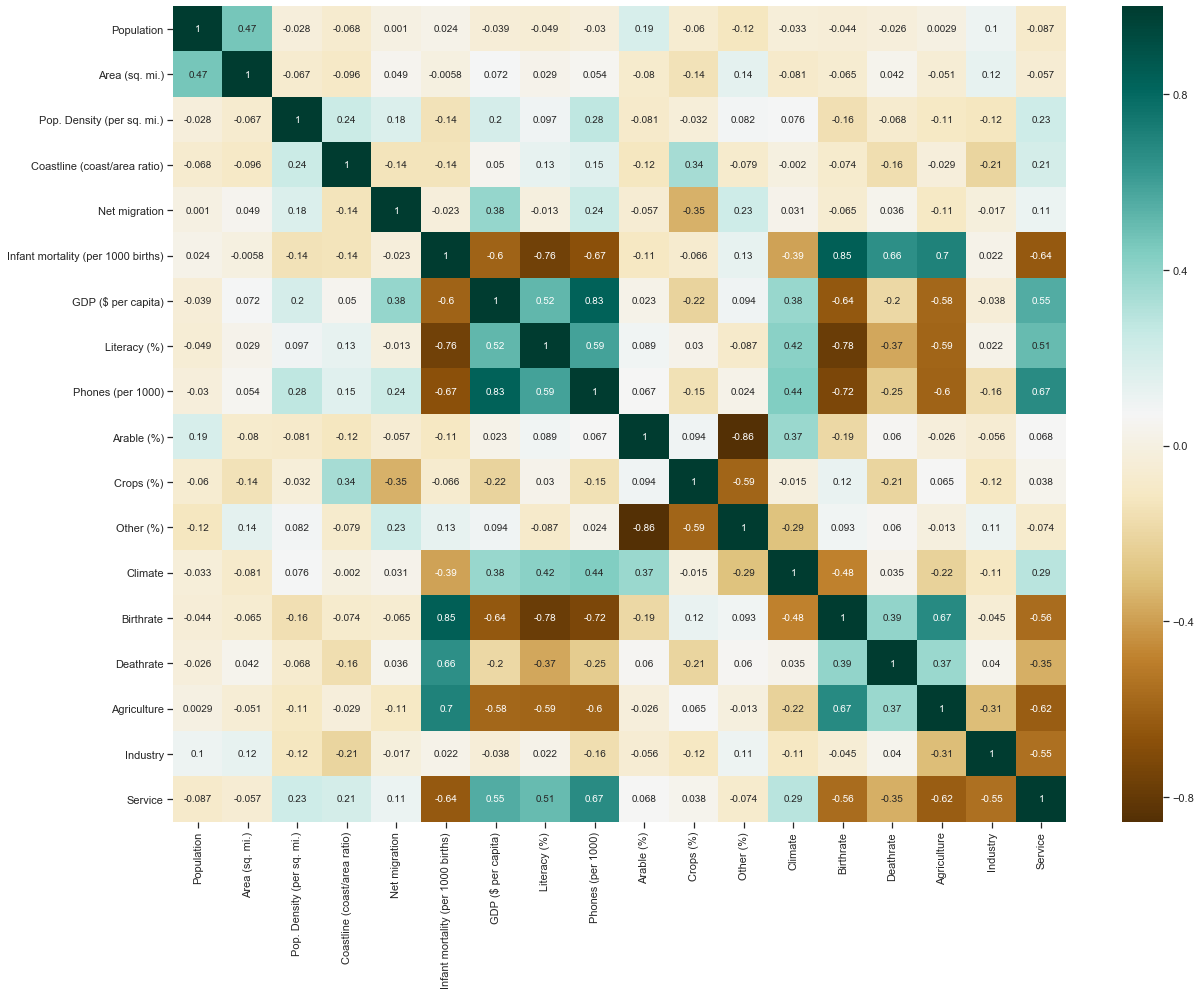

In [196]:
plt.figure(figsize=(20, 15))
correlation = df.corr()
sns.heatmap(correlation, cmap="BrBG", annot=True)

There are variables that seem to share strong correlations with each other. While we cannot discuss each individual variable here, we will mention the two that share over 80% correlation such as the” birthrate” and “infant mortality rate” & “GDP” and “Phones per 1000”. Lets have a look at these variables in more detail.

<function matplotlib.pyplot.show(*args, **kw)>

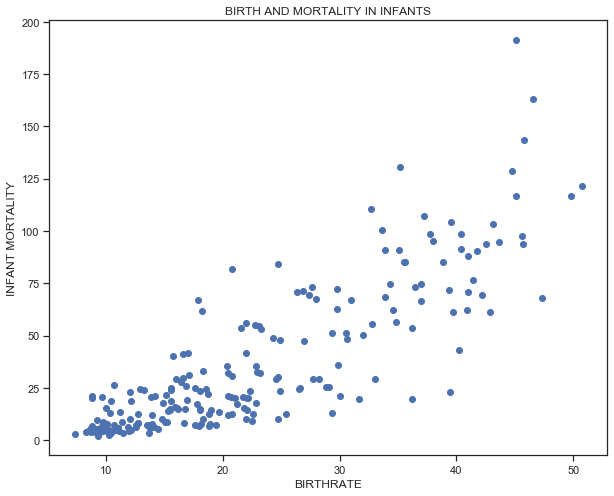

In [207]:
plt.figure(figsize=(10,8))
plt.scatter(df['Birthrate'], df['Infant mortality (per 1000 births)'])
plt.title('BIRTH AND MORTALITY IN INFANTS')
plt.xlabel('BIRTHRATE')
plt.ylabel('INFANT MORTALITY')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

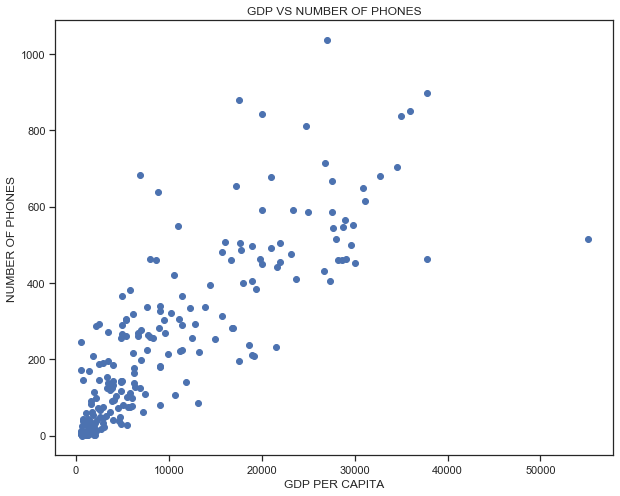

In [208]:
plt.figure(figsize=(10,8))
plt.scatter(df['GDP ($ per capita)'], df['Phones (per 1000)'])
plt.title('GDP VS NUMBER OF PHONES')
plt.xlabel('GDP PER CAPITA')
plt.ylabel('NUMBER OF PHONES')
plt.show

<br>

### HYPOTHESES TESTING

#### Western countries have the highest GDP per capita than any other region.

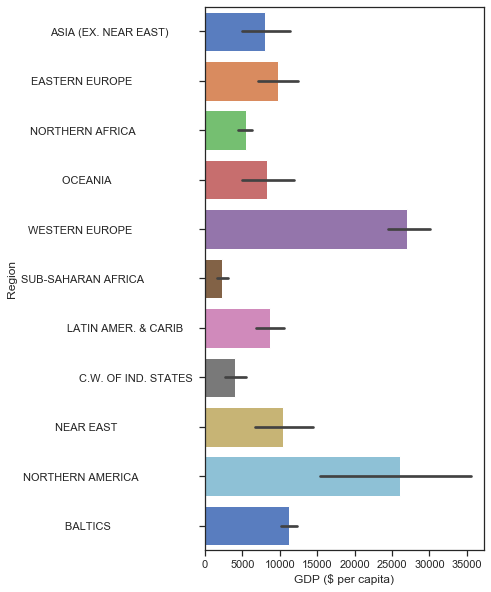

In [215]:
plt.figure( figsize = (5,10))  
ax = sns.barplot("GDP ($ per capita)", y= "Region", data=df,
                 palette="muted")

It goes without saying that the initial assumption is correct. Western countries which include North America have the highest GDP per capita in the whole world

#### African countries have the lowest literacy rate in the whole world and Asia has the highest literacy rate

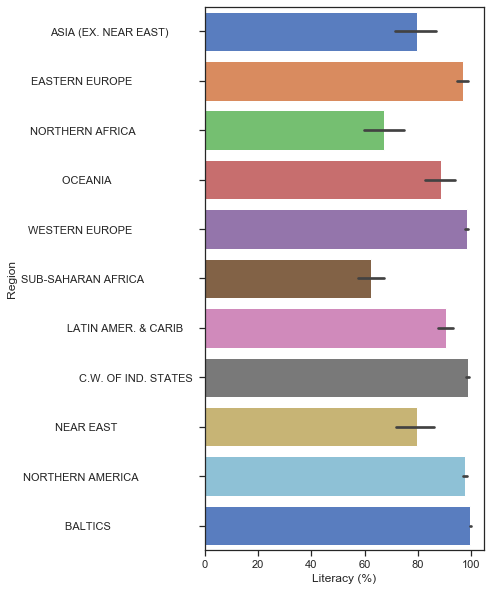

In [216]:
plt.figure( figsize = (5,10))  
ax = sns.barplot("Literacy (%)", y= "Region", data=df,
                 palette="muted")

While the initial assumption about the literacy rate in Africa is true, it is incorrect that Asians have the highest literacy rate. Western countries show the highest literacy rate in the world.

#### The middle eastern regions have the lowest arable lands.

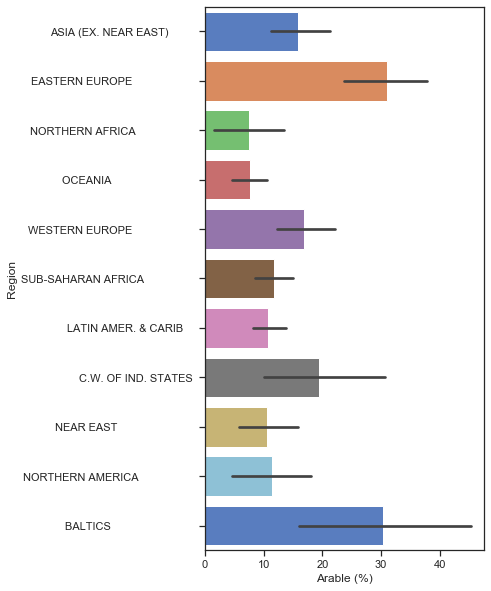

In [218]:
#Which region has most arable lands
plt.figure( figsize = (5,10))  
ax = sns.barplot("Arable (%)", y= "Region", data=df,
                 palette="muted")

Here, our assumption is not very far off. Oceana and Northern Africa has the least Arable lands but the Near East follows at a close 3rd.

#### The higher the literacy rate, the higher the GDP per capita

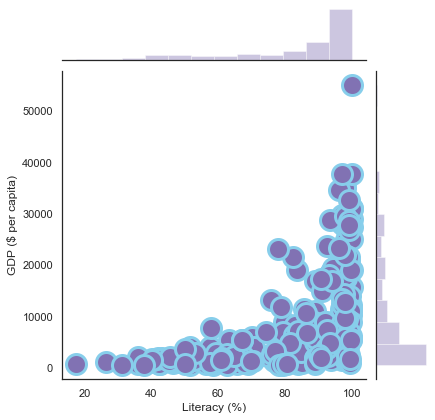

In [229]:
#Literacy rate vs GDP
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Literacy (%)"], y=df["GDP ($ per capita)"], kind='scatter', s=400, color='m', edgecolor="skyblue", linewidth=3)


#### The higher the literacy rate, the higher the service component as distribution to the economy of the country.

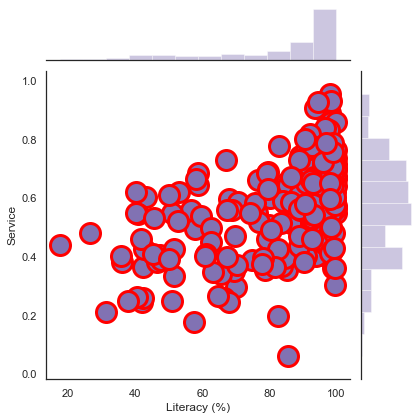

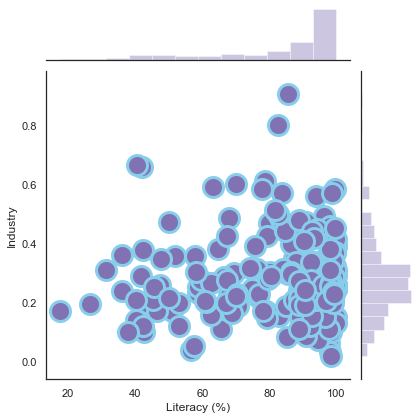

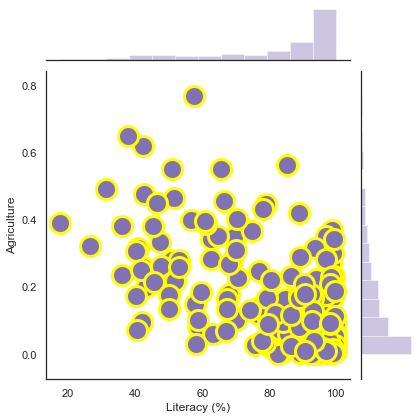

In [239]:
#Highest economic activity
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Literacy (%)"], y=df["Service"], kind='scatter', s=400, color='m', edgecolor="red", linewidth=3)
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["Literacy (%)"], y=df["Industry"], kind='scatter', s=400, color='m', edgecolor="skyblue", linewidth=3)
sns.jointplot(x=df["Literacy (%)"], y=df["Agriculture"], kind='scatter', s=400, color='m', edgecolor="yellow", linewidth=3)


When we look at the industry as a contribution to the economy, we can see that it does not correlate or have any relationship with the Literacy rates. The variables are spread across the cartesian graph without a clear specific pattern.<br>
<br>
The data changes when we look at the Service component. It seems to react to Literacy rates. There seems to be a marginal shift towards the top as literacy rates increase, This is very clear when looking the far end of the literacy scale.
<br>
<br>
Agriculture reacts in an opposite direction to service.  Agriculture declines in countries where Literacy rates are very high. This makes sense as more and more people look towards service and industry, the low skill and minimum wage jobs of the Agricultural sector will decline. 
<br>


#### The climate will have a high relationship with how arable the land is.

In [1]:
#Arable land vs Climate

plt.figure(figsize=(10,8))
plt.scatter(df['Climate'], df['Arable (%)'])
plt.title('GDP VS NUMBER OF PHONES')
plt.xlabel('CLIMATE')
plt.ylabel('ARABLE (%)')
plt.show

NameError: name 'plt' is not defined

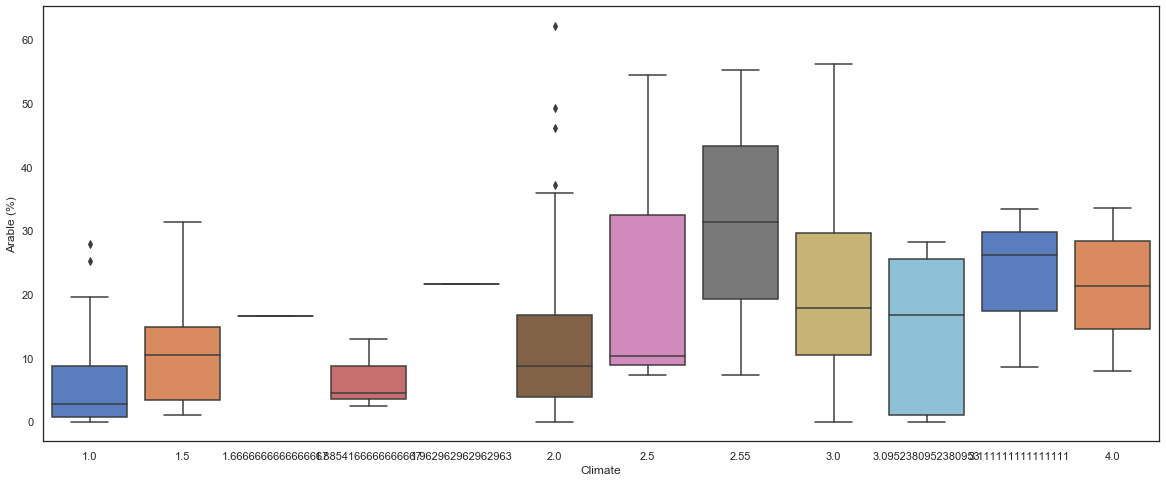

In [271]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="Climate", y="Arable (%)",
                    data=df, palette="muted")

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

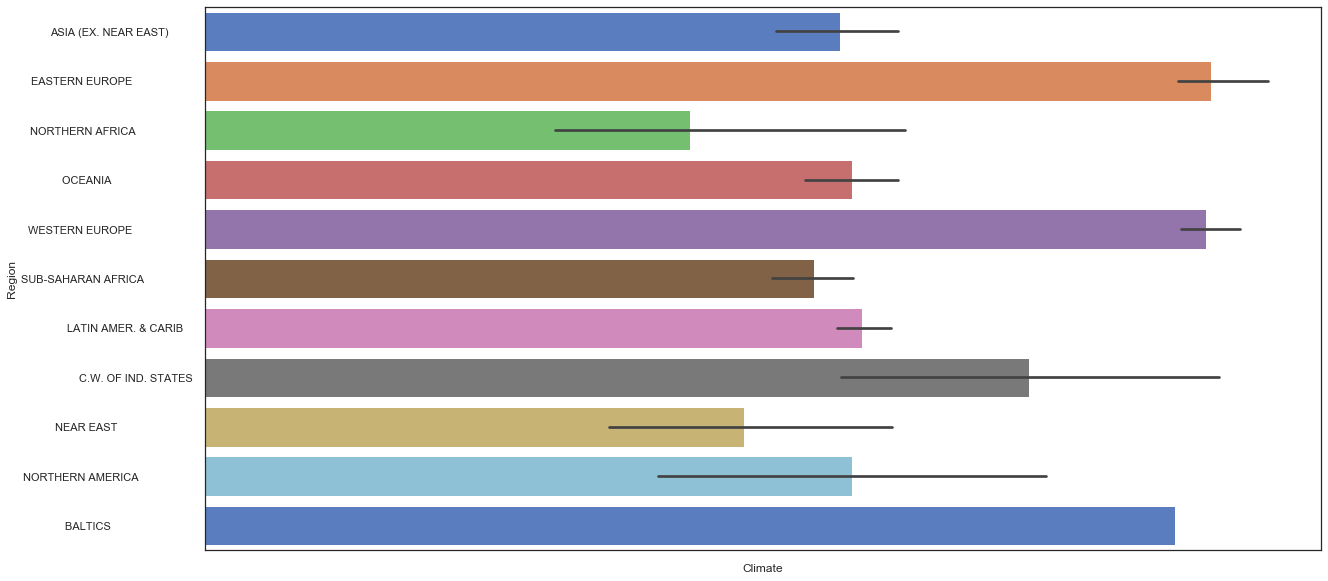

In [278]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Climate", y="Region",
                    data=df, palette="muted")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

From the data we can see that region that have a climate ‘code’ between 2.5 and 3.0 seem to enjoy greater portions of arable land.  The regions enjoying this land is Western Europe, the Baltics and Indonesian states.